In [1]:
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import glob
import dateutil as dutil
from salishsea_tools import viz_tools, visualisations
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    dept=np.copy(fm.variables['gdept_1d'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]

In [3]:
t0=dt.datetime(2014,12,1) # 1st start date of run
#te=dt.datetime(2016,12,1)# last start date of runfnum=18
stm=np.shape(tmask)
SiN=2.0
#nlen=36*2
nlen=53
dlist=[t0+dt.timedelta(days=ii*10) for ii in range(0,nlen)]

In [4]:
#sdir0='/results/SalishSea/nowcast-green/'
sdir1='/results/SalishSea/hindcast/'
#sdir3='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_HCMZ/'

In [5]:
tmaskC=np.copy(tmask)
tmaskC[:,:,370:490,:12]=0
tmaskC[:,:,887:,30:70]=0

In [6]:
tlist=dlist
SiGlobalTot=dict()
SiTot=dict()
BSiTot=dict()
DiatTot=dict()
changeSiGlobalTot=dict()
for idir in (sdir1,):
    fformat1='%d%b%y/'
    if idir.startswith('/data/eolson/MEOPAR/SS36runs/CedarRuns/'):
        fformatT='SalishSea_1h_*_ptrc_T_%Y%m%d-*.nc'
        fformatP='SalishSea_1h_*_ptrc_T_%Y%m%d-*.nc'
    #elif idir==sdir0:
    #    fformatT='SalishSea_1h_%Y%m%d_%Y%m%d_ptrc_T.nc'
    #    fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_grid_T.nc'
    elif idir==sdir1:
        fformatT='SalishSea_1h_%Y%m%d_%Y%m%d_ptrc_T.nc'
        fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
    sumSi=np.zeros((len(tlist),stm[1]))
    sumBSi=np.zeros((len(tlist),stm[1]))
    sumDiat=np.zeros((len(tlist),stm[1]))
    ind=-1
    for idt0 in tlist:
        ind=ind+1
        cdir=idt0.strftime(fformat1).lower()
        iffT=idt0.strftime(fformatT)
        iffP=idt0.strftime(fformatP)
        if idir.startswith('/data/eolson/MEOPAR/SS36runs/CedarRuns/'):
            sffT=idir+iffT
            sffP=idir+iffP
        elif idir.startswith('/results/'):
            sffT=idir+cdir+iffT
            sffP=idir+cdir+iffP
        f=nc.Dataset(glob.glob(sffT)[0])
        print(sffT)
        fP=nc.Dataset(glob.glob(sffP)[0])

        sumSi[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['silicon'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumBSi[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['biogenic_silicon'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumDiat[ind,:]=SiN*np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['diatoms'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        f.close()
        fP.close()
    SiGlobalTot[idir]=sumSi+sumBSi+sumDiat

/results/SalishSea/hindcast/01dec14/SalishSea_1h_20141201_20141201_ptrc_T.nc
/results/SalishSea/hindcast/11dec14/SalishSea_1h_20141211_20141211_ptrc_T.nc
/results/SalishSea/hindcast/21dec14/SalishSea_1h_20141221_20141221_ptrc_T.nc
/results/SalishSea/hindcast/31dec14/SalishSea_1h_20141231_20141231_ptrc_T.nc
/results/SalishSea/hindcast/10jan15/SalishSea_1h_20150110_20150110_ptrc_T.nc
/results/SalishSea/hindcast/20jan15/SalishSea_1h_20150120_20150120_ptrc_T.nc
/results/SalishSea/hindcast/30jan15/SalishSea_1h_20150130_20150130_ptrc_T.nc
/results/SalishSea/hindcast/09feb15/SalishSea_1h_20150209_20150209_ptrc_T.nc
/results/SalishSea/hindcast/19feb15/SalishSea_1h_20150219_20150219_ptrc_T.nc
/results/SalishSea/hindcast/01mar15/SalishSea_1h_20150301_20150301_ptrc_T.nc
/results/SalishSea/hindcast/11mar15/SalishSea_1h_20150311_20150311_ptrc_T.nc
/results/SalishSea/hindcast/21mar15/SalishSea_1h_20150321_20150321_ptrc_T.nc
/results/SalishSea/hindcast/31mar15/SalishSea_1h_20150331_20150331_ptrc_T.nc

In [7]:
siplot=SiGlobalTot[idir]-SiGlobalTot[idir][0,:]

In [8]:
siplot

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -0.94791073,  -0.95315679,  -0.95234535, ...,  -0.40079046,
         -0.34003928,   0.        ],
       [ -1.46034258,  -1.47684203,  -1.4987592 , ...,  -0.67533448,
         -0.59549936,   0.        ],
       ..., 
       [-21.34246114, -21.35754338, -21.29659039, ...,  -4.84231477,
         -3.97786403,   0.        ],
       [-33.18819903, -33.15786489, -33.11443942, ...,  -4.83125663,
         -3.94757213,   0.        ],
       [-32.90381014, -33.05822765, -33.2733245 , ...,  -4.69610935,
         -3.83637447,   0.        ]])

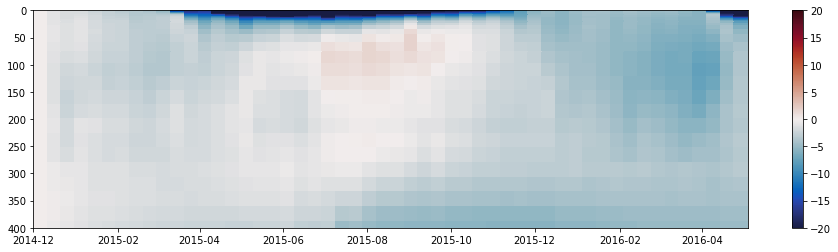

In [9]:
cm1=cmocean.cm.balance
fig,ax=plt.subplots(1,1,figsize=(16,4))
#plt.pcolormesh([t0+dt.timedelta(10*ii) for ii in range(0,30)],dept[0,:],np.transpose(siplot[:30,:]),cmap=cm1,vmin=-1e9,vmax=1e9)
m=ax.pcolormesh([t0+dt.timedelta(10*ii) for ii in range(0,nlen)],dept[0,:],np.transpose(siplot),cmap=cm1,vmin=-20,vmax=20)
ax.set_ylim(400,0)
fig.colorbar(m)

## repeat for N

In [10]:
tlist=dlist
NGlobalTot=dict()
VolTot=dict()
NO3Tot=dict()
NH4Tot=dict()
PONTot=dict()
DONTot=dict()
DiatTot=dict()
MyriTot=dict()
NanoTot=dict()
MiZoTot=dict()
changeNGlobalTot=dict()
for idir in (sdir1,):
    fformat1='%d%b%y/'
    if idir.startswith('/data/eolson/MEOPAR/SS36runs/CedarRuns/'):
        fformatT='SalishSea_1h_*_ptrc_T_%Y%m%d-*.nc'
        fformatP='SalishSea_1h_*_ptrc_T_%Y%m%d-*.nc'
    #elif idir==sdir0:
    #    fformatT='SalishSea_1h_%Y%m%d_%Y%m%d_ptrc_T.nc'
    #    fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_grid_T.nc'
    elif idir==sdir1:
        fformatT='SalishSea_1h_%Y%m%d_%Y%m%d_ptrc_T.nc'
        fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
    sumNO3=np.zeros((len(tlist),stm[1]))
    sumVol=np.zeros((len(tlist),stm[1]))
    sumNH4=np.zeros((len(tlist),stm[1]))
    sumPON=np.zeros((len(tlist),stm[1]))
    sumDON=np.zeros((len(tlist),stm[1]))
    sumDiat=np.zeros((len(tlist),stm[1]))
    sumMyri=np.zeros((len(tlist),stm[1]))
    sumNano=np.zeros((len(tlist),stm[1]))
    sumMiZo=np.zeros((len(tlist),stm[1]))
    ind=-1
    for idt0 in tlist:
        ind=ind+1
        cdir=idt0.strftime(fformat1).lower()
        iffT=idt0.strftime(fformatT)
        iffP=idt0.strftime(fformatP)
        if idir.startswith('/data/eolson/MEOPAR/SS36runs/CedarRuns/'):
            sffT=idir+iffT
            sffP=idir+iffP
        elif idir.startswith('/results/'):
            sffT=idir+cdir+iffT
            sffP=idir+cdir+iffP
        f=nc.Dataset(glob.glob(sffT)[0])
        print(sffT)
        fP=nc.Dataset(glob.glob(sffP)[0])

        sumNO3[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['nitrate'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumNH4[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['ammonium'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumPON[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['particulate_organic_nitrogen'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumDON[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['dissolved_organic_nitrogen'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumDiat[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['diatoms'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumMyri[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['ciliates'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        sumMiZo[ind,:]=np.mean(np.mean(np.ma.masked_where(tmaskC[0,:,:,:]==0,f.variables['microzooplankton'][0,:,:,:]),2),1) #mmol/m3*m3*10^-3=mol
        f.close()
        fP.close()
    NGlobalTot[idir]=sumNO3+sumNH4+sumPON+sumDON+sumDiat+sumMyri+sumNano+sumMiZo

/results/SalishSea/hindcast/01dec14/SalishSea_1h_20141201_20141201_ptrc_T.nc
/results/SalishSea/hindcast/11dec14/SalishSea_1h_20141211_20141211_ptrc_T.nc
/results/SalishSea/hindcast/21dec14/SalishSea_1h_20141221_20141221_ptrc_T.nc
/results/SalishSea/hindcast/31dec14/SalishSea_1h_20141231_20141231_ptrc_T.nc
/results/SalishSea/hindcast/10jan15/SalishSea_1h_20150110_20150110_ptrc_T.nc
/results/SalishSea/hindcast/20jan15/SalishSea_1h_20150120_20150120_ptrc_T.nc
/results/SalishSea/hindcast/30jan15/SalishSea_1h_20150130_20150130_ptrc_T.nc
/results/SalishSea/hindcast/09feb15/SalishSea_1h_20150209_20150209_ptrc_T.nc
/results/SalishSea/hindcast/19feb15/SalishSea_1h_20150219_20150219_ptrc_T.nc
/results/SalishSea/hindcast/01mar15/SalishSea_1h_20150301_20150301_ptrc_T.nc
/results/SalishSea/hindcast/11mar15/SalishSea_1h_20150311_20150311_ptrc_T.nc
/results/SalishSea/hindcast/21mar15/SalishSea_1h_20150321_20150321_ptrc_T.nc
/results/SalishSea/hindcast/31mar15/SalishSea_1h_20150331_20150331_ptrc_T.nc

In [11]:
Nplot=NGlobalTot[idir]-NGlobalTot[idir][0,:]

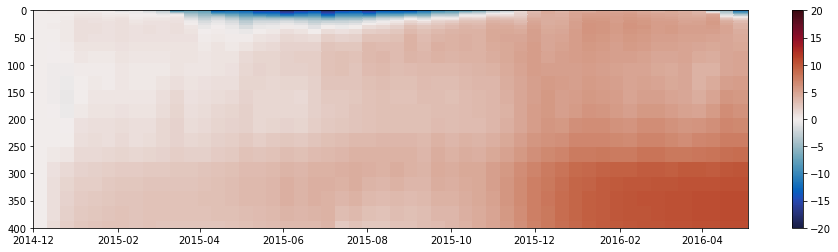

In [12]:
cm1=cmocean.cm.balance
fig,ax=plt.subplots(1,1,figsize=(16,4))
#plt.pcolormesh([t0+dt.timedelta(10*ii) for ii in range(0,30)],dept[0,:],np.transpose(siplot[:30,:]),cmap=cm1,vmin=-1e9,vmax=1e9)
m=ax.pcolormesh([t0+dt.timedelta(10*ii) for ii in range(0,nlen)],dept[0,:],np.transpose(Nplot),cmap=cm1,vmin=-20,vmax=20)
ax.set_ylim(400,0)
fig.colorbar(m)

## Thalweg plots

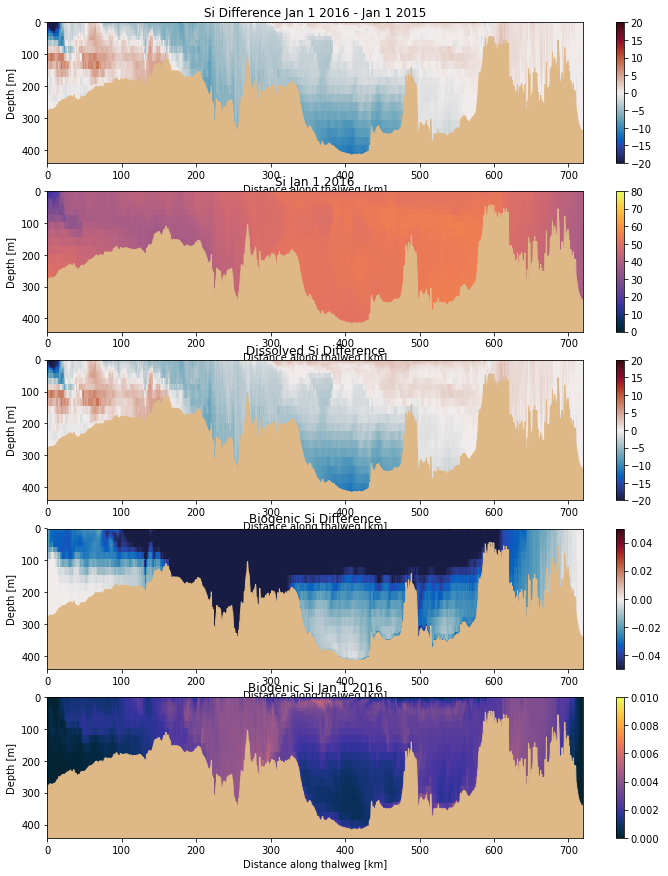

In [28]:

t1=dt.datetime(2015,1,1)
t2=dt.datetime(2016,1,1)
f1=nc.Dataset(glob.glob(idir+t1.strftime(fformat1).lower()+t1.strftime(fformatT))[0])
f2=nc.Dataset(glob.glob(idir+t2.strftime(fformat1).lower()+t2.strftime(fformatT))[0])
var=f2.variables['silicon'][0,:,:,:]+f2.variables['biogenic_silicon'][0,:,:,:]+SiN*f2.variables['diatoms'][0,:,:,:]-(
        f1.variables['silicon'][0,:,:,:]+f1.variables['biogenic_silicon'][0,:,:,:]+SiN*f1.variables['diatoms'][0,:,:,:])
fig,ax=plt.subplots(5,1,figsize=(12,15))
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
m=visualisations.contour_thalweg(ax[0],var,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[0].set_title('Si Difference Jan 1 2016 - Jan 1 2015')

var2=f2.variables['silicon'][0,:,:,:]+f2.variables['biogenic_silicon'][0,:,:,:]+SiN*f2.variables['diatoms'][0,:,:,:]
m=visualisations.contour_thalweg(ax[1],var2,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':80})
ax[1].set_title('Si Jan 1 2016')

var3=f2.variables['silicon'][0,:,:,:]-f1.variables['silicon'][0,:,:,:]
m=visualisations.contour_thalweg(ax[2],var3,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[2].set_title('Dissolved Si Difference')

var4=f2.variables['biogenic_silicon'][0,:,:,:]-f1.variables['biogenic_silicon'][0,:,:,:]
m=visualisations.contour_thalweg(ax[3],var4,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-.05,'vmax':.05})
ax[3].set_title('Biogenic Si Difference')

var5=f2.variables['biogenic_silicon'][0,:,:,:]
m=visualisations.contour_thalweg(ax[4],var5,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':.01})
ax[4].set_title('Biogenic Si Jan 1 2016')

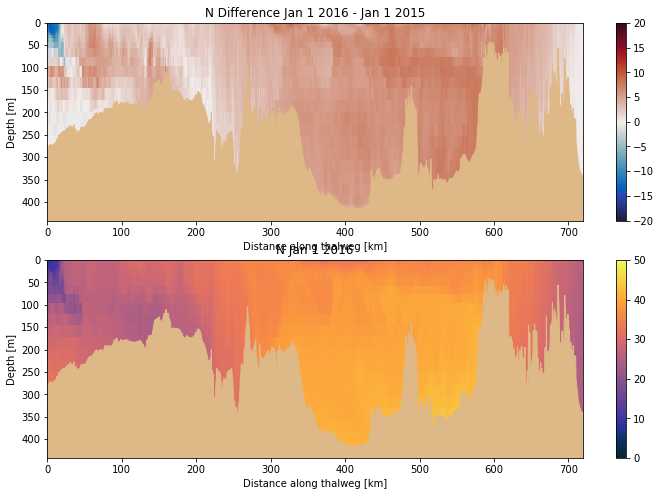

In [14]:
varN=f2.variables['nitrate'][0,:,:,:]+f2.variables['ammonium'][0,:,:,:]+f2.variables['particulate_organic_nitrogen'][0,:,:,:]+\
        f2.variables['dissolved_organic_nitrogen'][0,:,:,:]+f2.variables['diatoms'][0,:,:,:]+f2.variables['ciliates'][0,:,:,:]+f2.variables['microzooplankton'][0,:,:,:]-(
     f1.variables['nitrate'][0,:,:,:]+f1.variables['ammonium'][0,:,:,:]+f1.variables['particulate_organic_nitrogen'][0,:,:,:]+\
        f1.variables['dissolved_organic_nitrogen'][0,:,:,:]++f1.variables['diatoms'][0,:,:,:]+f1.variables['ciliates'][0,:,:,:]+f1.variables['microzooplankton'][0,:,:,:])
fig,ax=plt.subplots(2,1,figsize=(12,8))
m=visualisations.contour_thalweg(ax[0],varN,fb,fm,method='pcolormesh',cmap=cmocean.cm.balance,mesh_args={'vmin':-20,'vmax':20})
ax[0].set_title('N Difference Jan 1 2016 - Jan 1 2015')

varN2=f2.variables['nitrate'][0,:,:,:]+f2.variables['ammonium'][0,:,:,:]+f2.variables['particulate_organic_nitrogen'][0,:,:,:]+\
        f2.variables['dissolved_organic_nitrogen'][0,:,:,:]+f2.variables['diatoms'][0,:,:,:]+f2.variables['ciliates'][0,:,:,:]+f2.variables['microzooplankton'][0,:,:,:]
m=visualisations.contour_thalweg(ax[1],varN2,fb,fm,method='pcolormesh',cmap=cmocean.cm.thermal,mesh_args={'vmin':0,'vmax':50})
ax[1].set_title('N Jan 1 2016')